# CS50 AI with Python

##  Lecture 3

##  Optimization

* **Choosing the best option from a set of options**

In other words, we have to pick the correct tools that can solve a problem most efficiently. 

### Local Search

* Search algorithms that maintains a single node and searches by moving to a neighboring node

This is different from other types of search that were touched on before. Often times it saves computational power by sacrificing the optimal answer for one that is good enough.

An example of this can be shown in the search problem below:

We 4 houses in set locations, and want to build two hospitals. These two hospitals should have the minimal distance from each house to a hospital

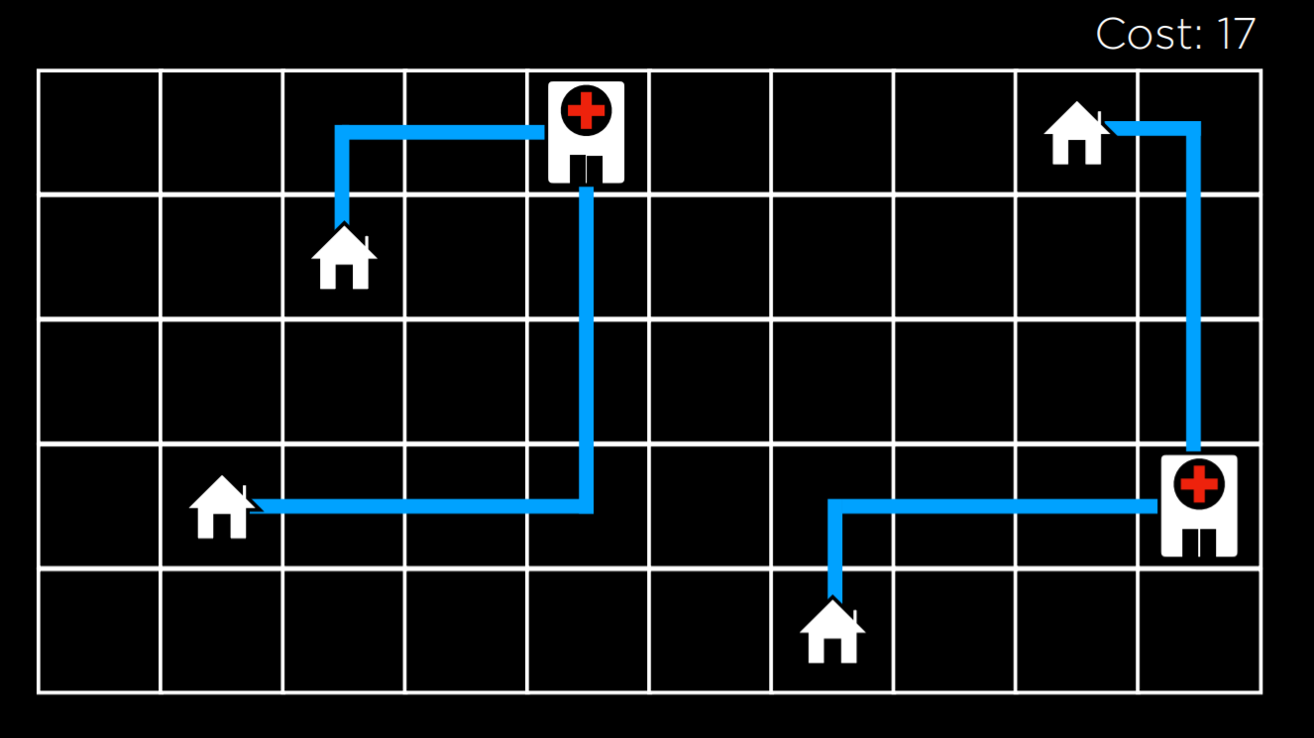

In the image above we saw a possible way to place these houses and hospitals. The distance between each house and a hospital is measured using Manhattan distance(Taxicab Geometry). The cost is the sum of the distance between each house from a hospital. Our goal is to minimize this cost.

We can represent these problems using a state-space landscape, where each possible configuration's cost is mapped. 

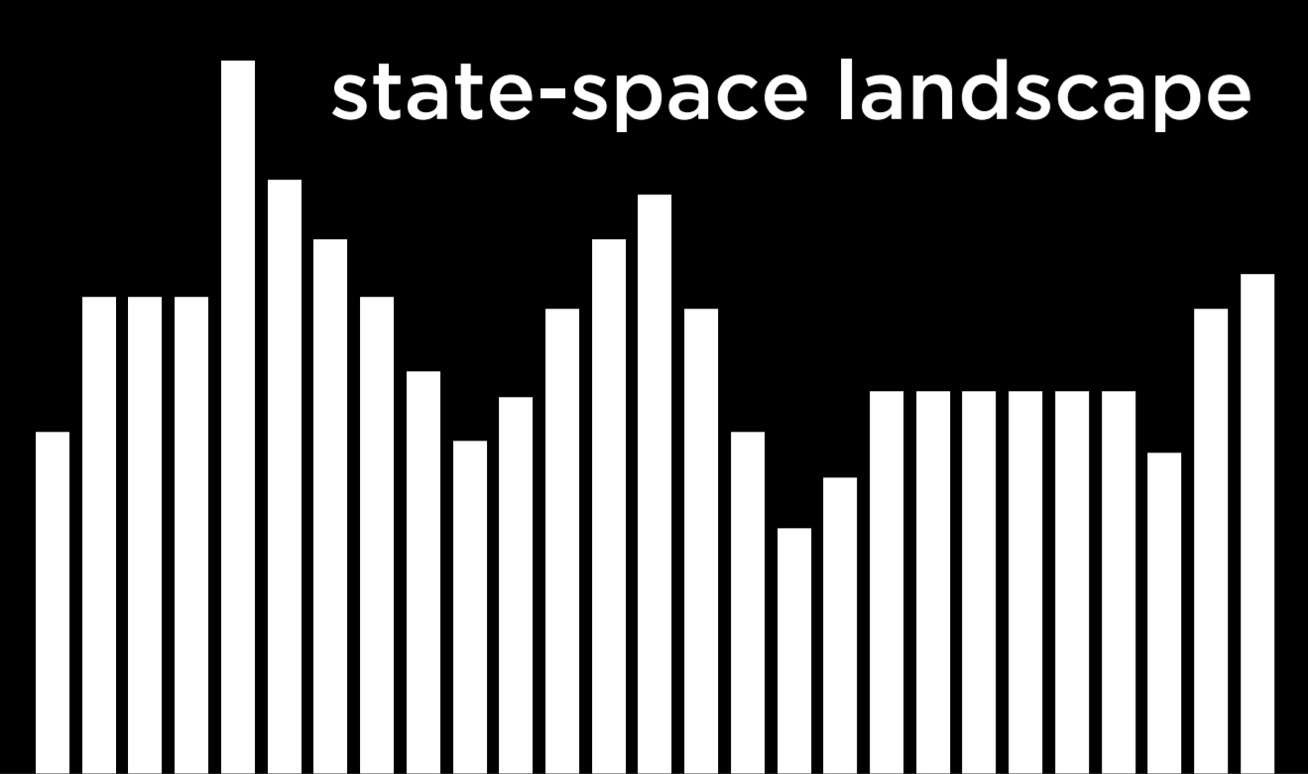

With this visualization in mind, we can define a few important terms:

* An **Objective Function** is a function that we use to maximize the value of the solution.
* A **Cost Function** is a function that we use to minimize the cost of the solution.
* A **Current State** is the state that is currently being ran through the function.
* A **Neighbor State** is a current a state can transition into.
  * Above a **Neighboring State** is a state to either side of the **Current State**
  * In general, **Neighbor States** are usually similar to the **Current State**. This often means that the value is also similar.

---

### Hill Climbing

**Hill Climbing** is one type of a local search algorithm. In this algorithm, the *neighbor states* are compared to the *current state*, and if any of them is better, we change the *current state* from the *current state* to that better node. What qualifies a node as a "better" node depends on what function we use.

In pseudocode, the **Hill Climbing** algorithm looks like the following.



> ``` function Hill-Climb(problem):
>
>   current = the initial state of problem
>
>   Repeat:
>
>       neighbor = the best valued neighbor of current
>
>       if neighbor not better than current:
>
>           return current
>
>       current = neighbor




In this algorithm, we start with a *current state*,. In some problems, we will know or be assigned a *current state*,, while in others we will have to pick one at random. 

After we have our *current state*, we repeat the steps below:

1. We evaluate the *neighboring states* of our *current state*, and select the one with the best value.
2. We then compare this *neighbor state* to our *current state*
   1. If the *current state* is better then the best valued *neighbor state* then we end the process and return the *current state*
   2. If the opposite is true, we repeat the process

Using the **Hill Climbing** algorithm, we can start to improve the locations we assigned to our hospitals. After a few transitions, the **Hill Climbing** algorithm returns the following state:

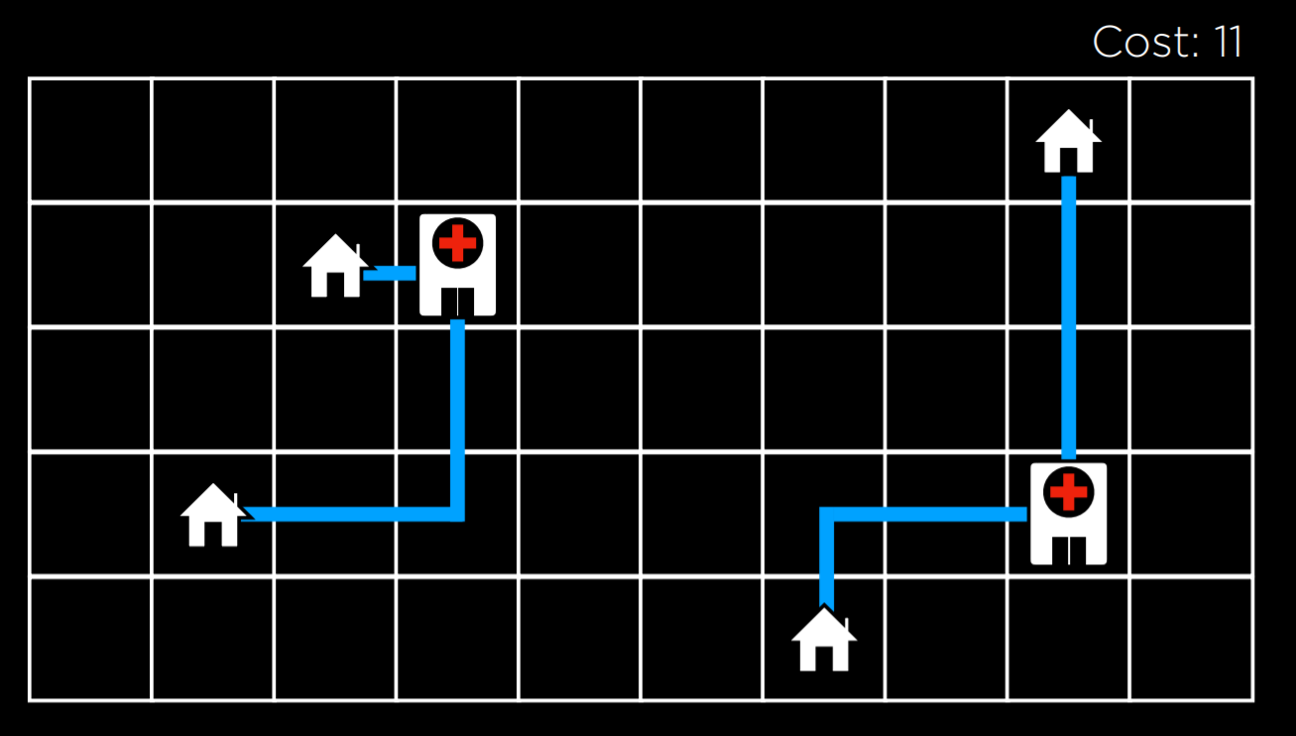





At this state, the cost is 11, which is better than our previous 17.

This version of the **Hill Climbing** algorithm can not find the best solution because it is limited to the *current state*'s *neighboring states*.

A **Hill Climbing** algorithm is short-sighted, and thereafter often settles for solutions that are not necessarily the *best* of all possible solutions.

### Local Minima & Maxima vs Global Minima & Maxima

---

#### Global & Local Maxima

A ***local* maximum**(plural: maxima) is a state that has a higher value than all it's *neighboring states*.

A ***global* maximum**(plural: maxima) is a state that has the highest value of *all states* in the *state-space*.

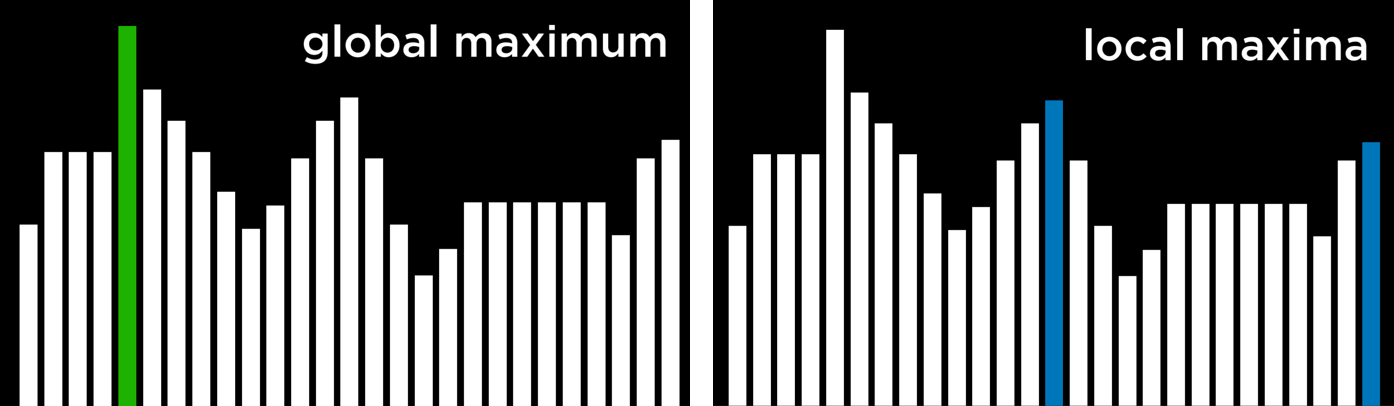

---

#### Global & Local Maxima

A ***local* minimum**(plural: minima) is a state that has a lower value than all it's *neighboring states*.

A ***global* minimum**(plural: minima) is a state that has the lower value of *all states* in the *state-space*.

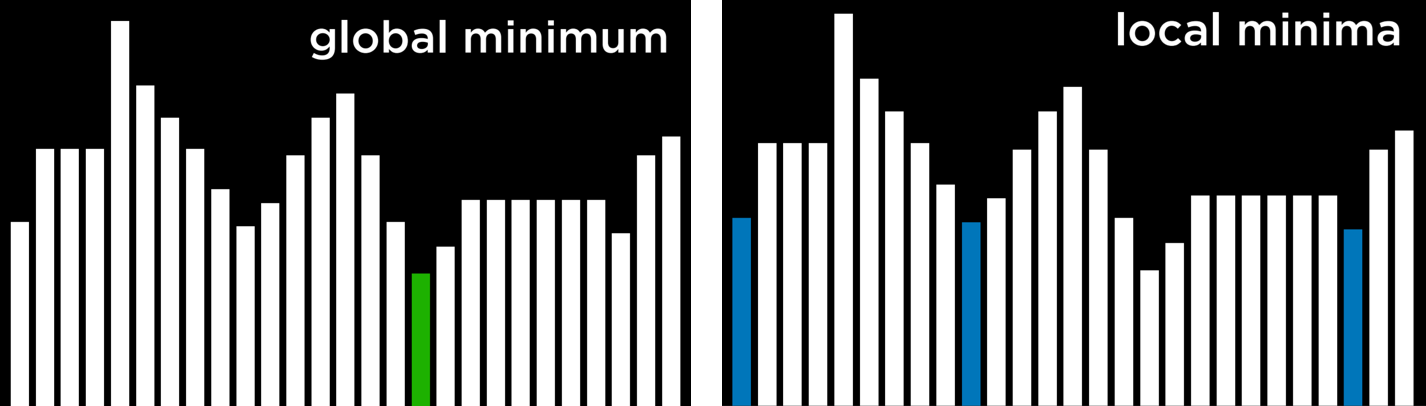

---

The problem with **Hill Climbing** algorithms is that they may end up in the ***local* minimum/maximum**. Once the algorithm reaches a point where the *current state* has a higher value than any one of it's *neighboring states*, it returns the *current state*.

Special types of ***local* maxima & minima** include the the ***flat local* minimum/maximum**.

A ***flat local* minimum/maximum** is where multiple *adjacent states* are of equal value, forming a plateau whose *neighbors* have a worse value.

A **shoulder** is like ***flat local* minimum/maximum**, except the *neighbors* of the plateau can either have a better or worse value.

![alt text](flatshoulder.png)

### Variations of Hill Climbing

Due to limitations of **Hill Climbing**, there are multiple variants designed to overcome the problem of being stuck on ***local* minima/maxima**.

Each one of the algorithms below still has potential of being stuck on ***local* minima/maxima**.

* **Steepest-ascent**
  * Choose the highest valued *neighbor*. This is the standard variation of the **Hill Climbing** algorithm
* **Stochastic**
  * Choose randomly from one of the higher-valued *neighbors*, randomizing the direction we choose to go in. The logic behind this is that the highest value neighbor leads to a ***flat local* minimum/maximum**, and the the other leads to the ***global* minimum/maximum**.
* **First-Choice**
  * Choose the first higher-valued neighbor
* **Random-restart**
  * Conduct the **Hill Climbing** algorithm multiple times. Each time, start from a random *state*. Then compare the *maxima/minima* from each iteration, and choose the highest/lowest of the *maxima/minima*. 
* **Local Beam Search**
  * Chooses the ***k*** highest-valued neighbors. This unlike most ***local* search algorithms**, this type of algorithm uses multiple *nodes* instead of just one.

Although local search algorithms do not always give the best solution, they can provide a solution that is good enough.



In [1]:
height = "height" # input
width = "width" # input
num_hospitals = "num_hospitals" # input
houses = set()
hospitals = set()
maximum = None #optional input

while maximum is None or count < maximum:
            count += 1
            best_neighbors = []
            best_neighbor_cost = None

            # Consider all hospitals to move
            for hospital in hospitals:

                # Consider all neighbors for that hospital
                for replacement in get_neighbors(*hospital): # a function that gets the neighbor of a certain position

                    # Generate a neighboring set of hospitals
                    neighbor = hospitals.copy()
                    neighbor.remove(hospital)
                    neighbor.add(replacement)

                    # Check if neighbor is best so far
                    cost = get_cost(neighbor) #the cost/manhattan distance function we want to minimize
                    if best_neighbor_cost is None or cost < best_neighbor_cost:
                        best_neighbor_cost = cost
                        best_neighbors = [neighbor]
                    elif best_neighbor_cost == cost:
                        best_neighbors.append(neighbor)

            # None of the neighbors are better than the current state
            if best_neighbor_cost >= get_cost(hospitals): #the cost/manhattan distance function we want to minimize
                return hospitals

            # Move to a highest-valued neighbor
            else:
                if log:
                    print(f"Found better neighbor: cost {best_neighbor_cost}")
                hospitals = random.choice(best_neighbors) 

SyntaxError: 'return' outside function (880013746.py, line 34)

Above is a representation of the **Hill Climbing** algorithm in code. 

There is a whole code file of customizing and playing around with this algorithm.

This code file also includes different variants.

### Simulated Annealing

Although we have considered variations of the **Hill Climbing** algorithm, they all share a common fault:
* They get stuck on a ***local* maximum/minimum**.

**Simulated Annealing** solves this problem. **Simulated Annealing** allows the algorithm to get out of a ***local* maximum/minimum**. 

**Annealing** involves heating and slowly cooling metal to toughen it, and this concept is used metaphorically in the **simulated annealing** algorithm. The algorithm starts at a high "temperature" to allow *random state* changes (even to worse states), helping it escape *local maxima*. As the temperature decreases, it becomes less random and more selective, gradually "freezing" into a better solution.

Below is the pseudocode for simulated annealing:

> function simulated-annealing( ```problem```, ```max```):
>   ```current``` = initial states of problem
>   for ```t``` = 1 to max:
>       ```T``` = *TEMPERATURE*(```t```)
>       neighbor = random neighbor of current
>       ```ΔE``` = how much better neighbor is than current
>       if ```ΔE``` > 0:
>           current = neighbor
>       with probability ```e^(ΔE/T)``` set ```current = neighbor```
>   return current

#### What does this code do? 

1. **The Input** 🔡
   * The **problem** you are trying to solve.
   * A number called **max** that tells algorithm **how many times to repeat the search iterations**.
2. **Each Iteration** 🔁
   * The algorithm gets a number called **T(temperature)** using a **temperature function**
     * If it is early on *T is high*.
     * If it is later on *T is low*.
   * The **Temperature** is how random the search is.
     * For example if *T is high* then the search is random and is more likely to pick a *neighbor* that's value is lower than the *current state* is. 
     * If *T is low* then the search favors *neighbors* with higher values more than it would if *T is high*.
   * It then picks a **random neighbor (a new possible solution that's a little different from the current one)**
   * After choosing the neighbor it calculates **ΔE**, which is calculated like:
     * ```ΔE = new_solution_score - current_solution_score```
     * So if ```ΔE``` > 0 → the new solution is **better**.
     * If ```ΔE``` < 0 → the new one is **worse**.
3. **Decision Time** 🤔💭
   * If the new solution is **better** ( ```ΔE``` > 0), **we will always accept the neighbor**.
   * If it’s *worse* (```ΔE``` < 0), we might still accept it, but we roll the dice:
     * We accept it with a probability of:
       * ```e^(ΔE / T)```
     * Because ```ΔE is negative```, this is a *number between 0 and 1*.
     * The more negative it is, the lower the chance.
     * But if *T is high (early on)*, even a bad move might still be accepted.

#### 🧠 Why Does This Work?

Sometimes the algorithm is stuck in a local best solution (a "pretty good" one), but there might be something better out there.

So, early on, the algorithm is adventurous — willing to try worse options, just in case they lead to better ones later.

Later, the algorithm settles down and stops taking bad choices.

##### The Math Part

e is just a constant, about 2.72.

ΔE / T is a small negative number when:

ΔE is very negative (bad solution).

Or when T is small (late in the process).

That negative number makes e^(ΔE/T) a tiny number, so the worse the option, the less likely we accept it.





### Traveling Salesman Problem

Traveling Salesman Problem

In the traveling salesman problem, the task is to connect all points while choosing the shortest possible distance. This is, for example, what delivery companies need to do: find the shortest route from the store to all the customers’ houses and back.

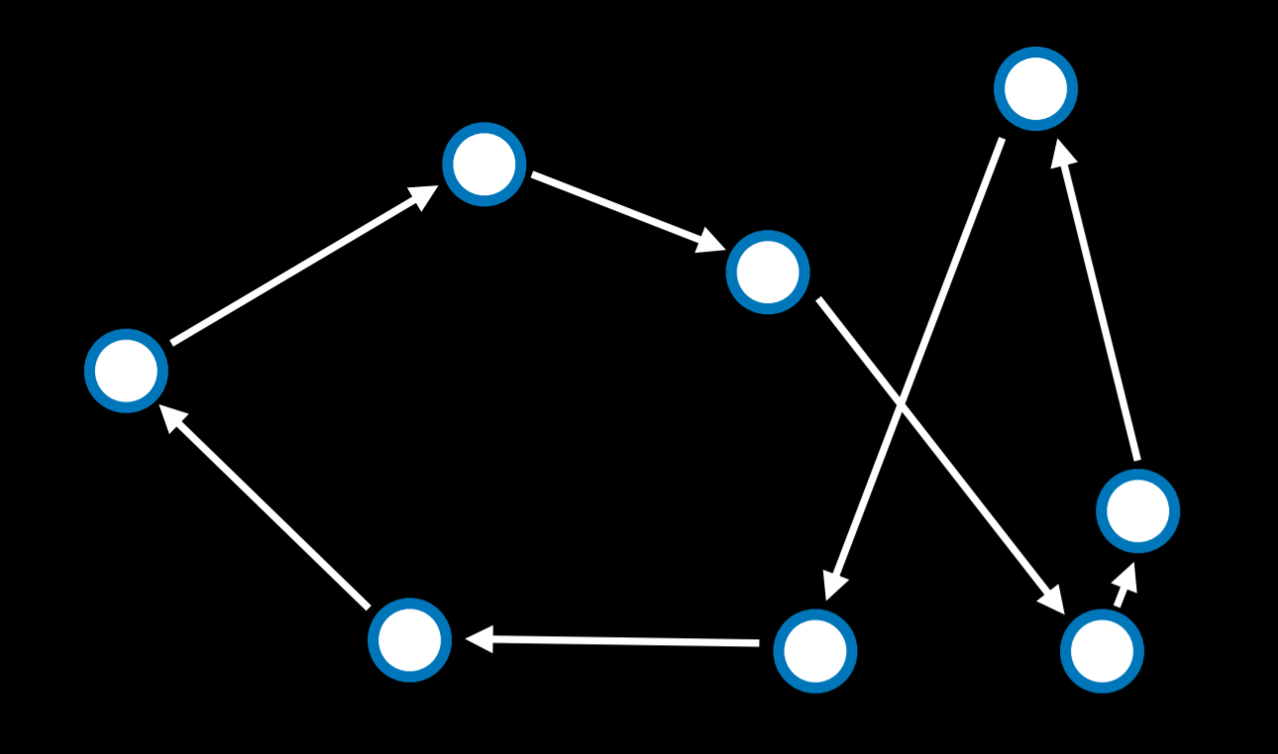

In this case, a neighbor state might be seen as a state where two arrows swap places. Calculating every possible combination makes this problem computationally demanding (having just 10 points gives us 10!, or 3,628,800 possible routes). By using the simulated annealing algorithm, a good solution can be found for a lower computational cost.

### Linear Programming

**Linear Programming(LP)** is a way to find the best outcome— like the lowest or highest profit-- when you are limited by certain rules or resources.

##### Key Parts of a Linear Programming problem:

1. **Cost Function**
    * What you are trying to minimize or maximize.
      * Ex.
      * ```Cost =  50x₁ + 80x₂```
2. **Constraints**
    * There are limits that must be satisfied. They usually are inequalities.
      * Ex.
      * Labor: ```5x₁ + 2x₂ ≤ 20``` (Only 20 units of labor are available)
3. **Variable Bounds**
    * Each variable in the Linear Equation might have limits
      * Ex.
      * ```x₁ ≥ 0``` and ```x₂ ≥ 0```

Consider the following problem:


* You have **two machines**:

  * *Machine X₁* costs **$50/hour**

  * *Machine X₂* costs **$80/hour**

* You want to run these machines in a way that:

  * **Minimizes the total cost**

  * **Stays within resource limits**

  * **Meets production requirements**

* What You're Working With:
  * You have **20 units of labor available**.

    * X₁ uses **5 units/hour**

    * X₂ uses **2 units/hour**

* You need to produce **at least 90 units of output.**

  * X₁ produces **10 units/hour**

  * X₂ produces **12 units/hour**

The Math:

  * **Minimize cost:**
    * ```50x₁ + 80x₂```

  * **Labor limit:**
    * ```5x₁ + 2x₂ ≤ 20```

  * **Production requirement:**
    * ```10x₁ + 12x₂ ≥ 90 (which we rewrite as -10x₁ - 12x₂ ≤ -90 to match standard form)```

  *  ```x₁ ≥ 0, x₂ ≥ 0``` (you can't run machines a negative amount of time)

An optimizing algorithm for linear programming requires background knowledge in geometry and linear algebra that we don’t want to assume. Instead, we can use algorithms that already exist, such as Simplex and Interior-Point.

The following is a linear programming example that uses the scipy library in Python:

In [ ]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\nirva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import scipy.optimize

# Objective Function: 50x_1 + 80x_2
# Constraint 1: 5x_1 + 2x_2 <= 20
# Constraint 2: -10x_1 + -12x_2 <= -90

result = scipy.optimize.linprog(
    [50, 80],  # Cost function: 50x_1 + 80x_2
    A_ub=[[5, 2], [-10, -12]],  # Coefficients for inequalities
    b_ub=[20, -90],  # Constraints for inequalities: 20 and -90
)

if result.success:
    print(f"X1: {round(result.x[0], 2)} hours")
    print(f"X2: {round(result.x[1], 2)} hours")
else:
    print("No solution")

X1: 1.5 hours
X2: 6.25 hours


### Constraint Satisfaction

**Constraint Satisfaction** problems are a class of problems where variables need to be assigned values while satisfying some conditions.

*Constraint satisfaction* problems have the following properties:

* Set of **variables** (x₁, x₂, …, xₙ)
* Set of **domains for each variable** {D₁, D₂, …, Dₙ}
* Set of **constraints C**

Sudoku is an example of a *constraint satisfaction* problem, where each empty is square is a variable, the domain is 1-9 and the constraints are the squares can not be equal to each other in a row, column, or bigger square.

Another example of a *constraint satisfaction* problem is:
* Where **students** labeled **1-4** are taking **three courses** from *A, B, ..., G*. Each course ***needs* to have an *exam***
* The possible days for exams are **Monday**, **Tuesday**, and **Wednesday**. 
* The constraint in this scenario is that the same student can not have **two exams on the same day.**
The properties of this problem are
* Variables -> Courses
* Domain -> Days
* Constraints -> Courses can’t be scheduled to have an exam on the same day because the same student is taking them

This can be visualized as follows:

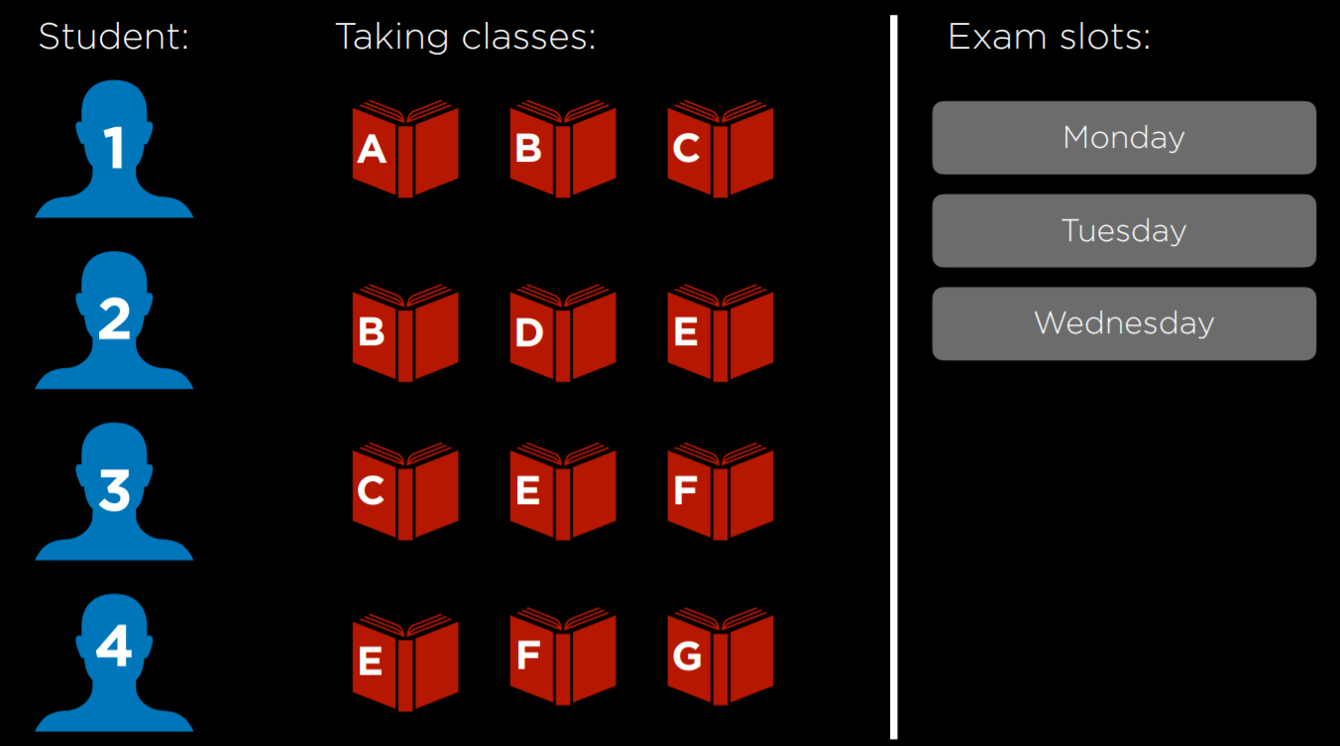

The This problem can be solved using constraints that are represented as a graph. Each node on the graph is a course, and an edge is drawn between two courses if they can’t be scheduled on the same day. In this case, the graph will look this:

![alt text](constraintsatisfaction2.png)

A few more terms and definitions are worth knowing about constraint satisfaction problems:

* A **Hard Constraint** is a constraint that must be satisfied in order for a solution to be correct.
* A **Soft Constraint** is a constraint that expresses which solution is preferred over other solutions where the constraint is not satisfied.
* A **Unary Constraint** is a constraint that involves one variable.
* A **Binary Constraint** is a constraint that involves two variables.

#### Node Consistency

Node Consistency is when all the values in a variables satisfy the variables unary constraints.

Consider the following situation:

* There are *two courses **A**, and **B***
* The domain for *each course* is *{Monday, Tuesday, Wednesday}*
* The constraints are *{A ≠ Mon, B ≠ Tue, B ≠ Mon, A ≠ B}*

Neither A *nor* B is *consistent* because the existing constraints *prevent* them from being able to take *every value in their domain*. 

However if we **remove Monday from A's domain**, it will satisfy all unary constraints, and therefore will have **node consistency**.

To achieve **node consistency** in B and have unary constraint satisfaction, we will **remove both Monday & Tuesday from it's domain.**

It is important to note that *A ≠ B* **contains two variables** and therefore **is not one of the hard constraints in node consistency**.

#### Arc Consistency

Arc consistency is when all values in a variable's domain satisfy the variable's binary constraints.

This can be thought about like node consistency but with constraints with two variables.

Arc consistency is a concept from Constraint Satisfaction Problems (CSPs). For an arc 𝐴 → 𝐵 to be arc-consistent, this must hold:

> *For every value 𝑎 ∈ Domain ( 𝐴 ), there is some value 𝑏 ∈ Domain ( 𝐵 ) b∈Domain(B) such that the pair ( 𝑎 , 𝑏 ) (a,b) satisfies the constraint between A and B.*

Consider the previous example used to explain node consistency with the revised Domains.

* A: {Tuesday, Wednesday}

* B: {Wednesday}

Previously we reconstructed the domains so they had node consistency. Now we want reconstruct these domains to have arc consistency. To do this we have to consider the binary constraint we did not factor before.

* A ≠ B — A and B must have different values.

A’s domain: {Tuesday, Wednesday}
B’s domain: {Wednesday}

As you can see, between **A & B's domain**, there is a **common value: Wednesday**. This is a violation of arc consistency. To resolve this conflict we can do the following:

* A’s domain: {Tuesday, Wednesday}, B’s domain: {Wednesday} → A’s domain: {Tuesday,  ~~Wednesday~~}, B’s domain: {Wednesday} 

This way **A ≠ B.** 

There are algorithms that can look at these CSPs and determine whether they are arc consistent, and if not, the algorithm makes a variable arc-consistent with respect to some other variable. Below is pseudocode of such algorithm.

This revise function does the following:

* Checks every value ```x``` in ```X```'s domain
* For each ```x```, it looks for at least one value ```y``` in ```Y```'s domain such that the constraint between ```X``` and ```Y``` is satisfied.
* If no such ```y``` exists, then ```x``` is removed from ```X```'s domain.
* The algorithm tracks whether any changes were made via the ```revised``` flag.
* Returns ```true``` if any values were removed from ```X```'s domain.

Often we are interested in making the whole problem arc-consistent and not just one variable with respect to another. In this case, we will use an algorithm called AC-3, which uses Revise:





* Initializes a queue with all arcs in the CSP (e.g., (```X```, ```Y```) means "make X arc-consistent with Y").

* Continuously dequeues arcs and applies Revise.

* If ```Revise``` made changes:

  * And if ```X```'s domain is now empty, return ```false``` (no solution possible).

  * Otherwise, re-enqueue all arcs pointing to ```X``` from neighbors, excluding ```Y```.

* Repeats until queue is empty.

* If it completes without failure, the CSP is arc-consistent → returns ```true```.

There are some limitations of AC-3:

* **AC-3 doesn't solve the whole problem — it only simplifies it.**
* If the problem involves complex interdependencies between variables, those may not be detected or resolved just through arc consistency.
* For example, after AC-3 is applied to a problem with 4 students taking 3 courses each, the problem might remain unsolved if it requires considering combinations of multiple variables.

#### 🔍 CSP as a Search Problem

Constraint Satisfaction Problems (CSPs) can be reframed as search problems:

|       Component      	|                                  Description                                  	|
|:--------------------:	|:-----------------------------------------------------------------------------:	|
| **Initial State**    	| Empty assignment (no variables assigned yet).                                 	|
| **Actions**          	| Assign a variable a value → {var = val}.                                      	|
| **Transition Model** 	| Reflects how the current assignment changes by adding a new {var = val} pair. 	|
| **Goal Test**        	| All variables assigned + all constraints satisfied.                           	|
| **Path Cost**        	| Uniform cost → only the final solution matters, not the steps to get there.   	|

#### ❗ Why Not Use Naive Search?

* **Inefficient**: Pure search does not exploit constraints or variable relationships.

* **Better Approach**: Use CSP structure (like arc consistency, variable ordering, backtracking with constraint propagation) to prune the search space and solve more efficiently.

### 🔁 Backtracking Search

Backtracking is a recursive, depth-first search algorithm tailored to CSPs. It intelligently prunes invalid paths using constraints, rather than brute-force enumeration.

----

##### Pseudocode

#### Explanation

1. **Check for Completion**
   * If all variables are assigned and the domain satisfies the constraints →  return ```true```
2. **Select Unassigned Variable**
   * Choose the next variable to assign. There are multiple ways to choose:
     * Minimum Remaining Values (MRV)
     * Degree heuristic
3. **Iterate Over Possible Values**
   * For each value in the current variable's domain:
     *  If assigning this value keeps the assignment consistent with previous constraints:

        * Add {var = value} to the current assignment.

        * Recurse by calling Backtrack() on the new assignment.

        * If recursion returns a valid result → return it.

        * If it returns failure → remove {var = value} and try the next value.
4. **Backtrack on Failure**
    * If no value leads to a valid solution, return failure. This will backtrack to the previous level and try a different path.

---


* **Incremental Assignment**: Values are assigned one at a time, and each is checked immediately against current constraints.

* **Backtracking**: If no valid assignments remain for a variable, the algorithm undoes the most recent assignment and tries a new path.

* **Efficiency**: Much more efficient than brute-force, especially when combined with:

  * Forward checking

  * Constraint propagation (like AC-3)

  * Heuristics for variable/value selection 


#### Some Limitations include...

* Still exponential in the worst case

* Heuristics and constraint propagation greatly improve practical performance, but don't eliminate the need for search

Consider the following course of action:

![alt text](backtracking.png)

#### 🪜 Step-by-Step

1. **Start with an empty assignment**
   - No variables are assigned yet.
   - This is the initial state of the algorithm.

2. **Choose the first variable, `A`**
   - Assign it a value from its domain, e.g., `A = Monday`.

3. **Move to the next variable, `B`**
   - Try assigning `B = Monday`.

4. **Check constraints**
   - If the constraint is that `A ≠ B`, then assigning `B = Monday` when `A = Monday` fails.
   - So, this assignment is **rejected**.

5. **Try the next value for `B`**
   - Assign `B = Tuesday`.
   - This satisfies the constraint (`A ≠ B`), so it's **accepted**.

6. **Proceed to the next variable, `C`**
   - Continue the same process: try values for `C` and validate against `A` and `B`.

7. **Handle failure through backtracking**
   - If all values for `C` lead to constraint violations:
     - Backtrack to `B` and try the next value.
     - If `B` also exhausts all options, backtrack to `A`.

8. **Backtrack recursively**
   - If all values for all variables are tried and no valid assignment exists:
     - The algorithm concludes that the **problem is unsolvable**.

### 🧠 Inference in CSPs

Maintaining Arc Consistency (MAC)

- The improved algorithm is called the **Maintaining Arc-Consistency (MAC)** algorithm.
- After every new variable assignment in backtracking, MAC invokes the **AC-3 algorithm** to enforce arc consistency.
- The AC-3 process is limited to arcs of the form `(Y, X)` where `Y` is a neighbor of the variable `X` that was just assigned.
- This targeted inference helps prune the domain of neighboring variables and avoids many future conflicts.

### Revised Backtracking Algorithm (with Inference)



### The Role of the `Inference` Function

- The `Inference` function runs the **AC-3 algorithm** as described earlier.
- Its output consists of **all new assignments** that can be deduced by enforcing **arc-consistency**.
- These are not guesses — they are logical consequences of the current assignments and the CSP structure.
- By deducing these values early, we reduce the likelihood of conflicts and unnecessary backtracking.

---

###  Making the Algorithm Even More Efficient

So far, we have selected an unassigned variable **randomly**. However, smarter choices lead to better performance. This is where **heuristics** come in.

####  What is a Heuristic?

- A **heuristic** is a "rule of thumb" that often leads to better decisions than naive methods.
- It doesn't guarantee optimal results, but in practice it **speeds up search** and **reduces backtracking**.

---

### Minimum Remaining Values (MRV) Heuristic

- **MRV** chooses the variable with the **fewest remaining legal values** in its domain.
- Rationale:
  - If inference has already restricted a variable to 1 or 2 values,
    it's a bottleneck — we should deal with it sooner.
  - If assigning it leads to failure, it’s better to **fail fast** and backtrack early.
- This results in a **smaller search tree** and **fewer recursive calls**.

---
![alt text](mrv.png)